<a href="https://colab.research.google.com/github/bhatia-pooja/Sticks-Kebob-Case-Study/blob/main/Sticks_Kebob_Customer_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os

drive.mount("drive")

Mounted at drive


In [2]:
os.chdir('drive/MyDrive/Projects_Pooja')
print(drive)
print(os.getcwd())

<module 'google.colab.drive' from '/usr/local/lib/python3.10/dist-packages/google/colab/drive.py'>
/content/drive/MyDrive/Projects_Pooja


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
 df = pd.read_excel('stickskebob.xlsx')

# Data Cleaning

In [10]:
# Step 1: Consolidate the Profession Column
# Assuming you have multiple profession-related columns
profession_columns = [
    'What is your profession? - Accountant',
    'What is your profession? - Lawyer',
    'What is your profession? - General purpose contractor',
    'What is your profession? - Design',
    'What is your profession? - Educator',
    'What is your profession? - Homemaker',
    'What is your profession? - Business professional',
    'What is your profession? - Other (please specify)'
]

In [13]:
def consolidate_profession(row):
    for col in profession_columns:
        if pd.notna(row[col]):
            return row[col]
    return 'Not Specified'

df['Profession'] = df.apply(consolidate_profession, axis=1)

# Drop the original profession columns
df.drop(columns=profession_columns, inplace=True)


In [14]:
#Step 3: Remaning Columns
# Strip any leading or trailing spaces from the column names
df.columns = df.columns.str.strip()

# Consolidate the renaming in one block, ensuring that it matches the column names exactly
df.rename(columns={
    # Demographic Columns
    'What is your age?': 'Age',
    'What is your approximate average annual household income?': 'Income',
    'How would you best describe your household type?': 'Household_Type',
    'How many children, by age, currently live in your household? - less than 12 years old': 'Children_U12',
    'How many children, by age, currently live in your household? - 12-17 years old': 'Children_12_17',
    'How many children, by age, currently live in your household? - 18 and older': 'Children_18_Plus',
    'What is your gender?': 'Gender',

    # Behavioral Columns
    'Please indicate how important the following factors are when you visit a restaurant  - Convenient place to eat': 'Convenience_Rating',
    'Please indicate how important the following factors are when you visit a restaurant  - Variety of menu options': 'Menu_Variety_Rating',
    'Please indicate how important the following factors are when you visit a restaurant  - Good value for money': 'Value_Rating',
    'Please indicate how important the following factors are when you visit a restaurant  - Healthy menu options': 'Health_Rating',
    'Please indicate how important the following factors are when you visit a restaurant  - Food taste and satisfaction': 'Taste_Rating',
    'Please indicate how important the following factors are when you visit a restaurant  - Friendly staff': 'Staff_Rating',
    'Please indicate how important the following factors are when you visit a restaurant  - Pleasant ambiance': 'Ambiance_Rating',
    'Please indicate how important the following factors are when you visit a restaurant  - Consistency / reliability': 'Consistency_Rating',
    'Please indicate how important the following factors are when you visit a restaurant  - Part of community': 'Community_Rating',

    'Please indicate how you rate Sticks in comparison to similar restaurants that you visit regularly  - Convenient place to eat': 'Convenience_Importance',
    'Please indicate how you rate Sticks in comparison to similar restaurants that you visit regularly  - Variety of menu options': 'Menu_Variety_Importance',
    'Please indicate how you rate Sticks in comparison to similar restaurants that you visit regularly  - Good value for money': 'Value_Importance',
    'Please indicate how you rate Sticks in comparison to similar restaurants that you visit regularly  - Healthy menu options': 'Health_Importance',
    'Please indicate how you rate Sticks in comparison to similar restaurants that you visit regularly  - Food taste and satisfaction': 'Taste_Importance',
    'Please indicate how you rate Sticks in comparison to similar restaurants that you visit regularly  - Friendly staff': 'Staff_Importance',
    'Please indicate how you rate Sticks in comparison to similar restaurants that you visit regularly  - Pleasant ambiance': 'Ambiance_Importance',
    'Please indicate how you rate Sticks in comparison to similar restaurants that you visit regularly  - Consistency / reliability': 'Consistency_Importance',
    'Please indicate how you rate Sticks in comparison to similar restaurants that you visit regularly  - Part of community': 'Community_Importance'
}, inplace=True)

In [15]:
# Step 3: Create DataFrame with Relevant Columns for Analysis

# Select the columns that are relevant for analysis (demographics + behavioral)
relevant_columns = [
    'Age', 'Income', 'Gender', 'Household_Type', 'Children_U12', 'Children_12_17', 'Children_18_Plus', 'Profession',
    'Value_Importance', 'Health_Importance', 'Taste_Importance', 'Staff_Importance', 'Ambiance_Importance',
    'Consistency_Importance', 'Community_Importance', 'Convenience_Rating', 'Menu_Variety_Rating', 'Value_Rating',
    'Health_Rating', 'Taste_Rating', 'Staff_Rating', 'Ambiance_Rating', 'Consistency_Rating', 'Community_Rating'
]

df = df[relevant_columns]


In [16]:
# 1. Map the Gender column
df['Gender'] = df['Gender'].map({1: 'Female', 2: 'Male'})

# 2. Map the Age column
df['Age'] = df['Age'].map({
    0: 'Under 25',
    2: '26–40',
    3: '41–65',
    4: '65+',
    'Not Specified': 'Not Specified'
})

# 3. Map the Income column
df['Income'] = df['Income'].map({
    1: 'Under $50,000',
    2: '$50,000–$100,000',
    3: 'Over $100,000',
    'Not Specified': 'Not Specified'
})

# 4. Map the Household Type column
df['Household_Type'] = df['Household_Type'].map({
    1: 'Single',
    2: 'Family',
    3: 'Other',
    'Not Specified': 'Not Specified'
})

# 5. Map the Profession column (example mapping, adjust based on your actual data)
profession_map = {
    1: 'Accountant',
    2: 'Lawyer',
    3: 'General purpose contractor',
    4: 'Design',
    5: 'Educator',
    6: 'Homemaker',
    7: 'Business professional',
    'Not Specified': 'Not Specified'
}
df['Profession'] = df['Profession'].map(profession_map)

<ipython-input-16-473b6fc1a9ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].map({1: 'Female', 2: 'Male'})
<ipython-input-16-473b6fc1a9ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].map({
<ipython-input-16-473b6fc1a9ea>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [20]:
# Replace non-numeric values with 0 in the children columns
df['Children_U12'] = df['Children_U12'].fillna(0)
df['Children_12_17'] = df['Children_12_17'].fillna(0)
df['Children_18_Plus'] = df['Children_18_Plus'].fillna(0)

<ipython-input-20-d882fbf2ffb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Children_U12'] = df['Children_U12'].fillna(0)
<ipython-input-20-d882fbf2ffb3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Children_12_17'] = df['Children_12_17'].fillna(0)
<ipython-input-20-d882fbf2ffb3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

# Exploratory Analysis
---
Demographic Exploratory Plots



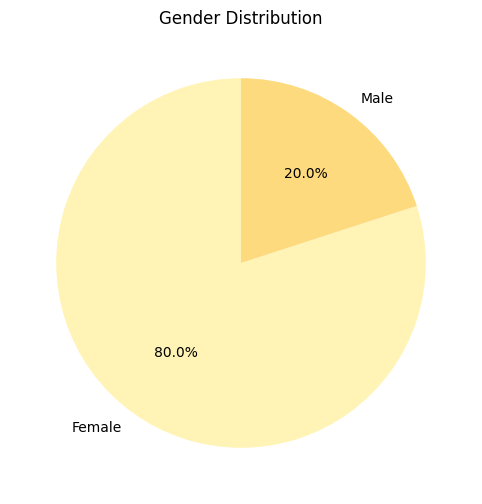

In [22]:
# Gender Distribution
gender_counts = df['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("YlOrBr"))
plt.title('Gender Distribution')
plt.show()


<ipython-input-23-1025c6d44030>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Age', data=df, palette='YlOrBr')


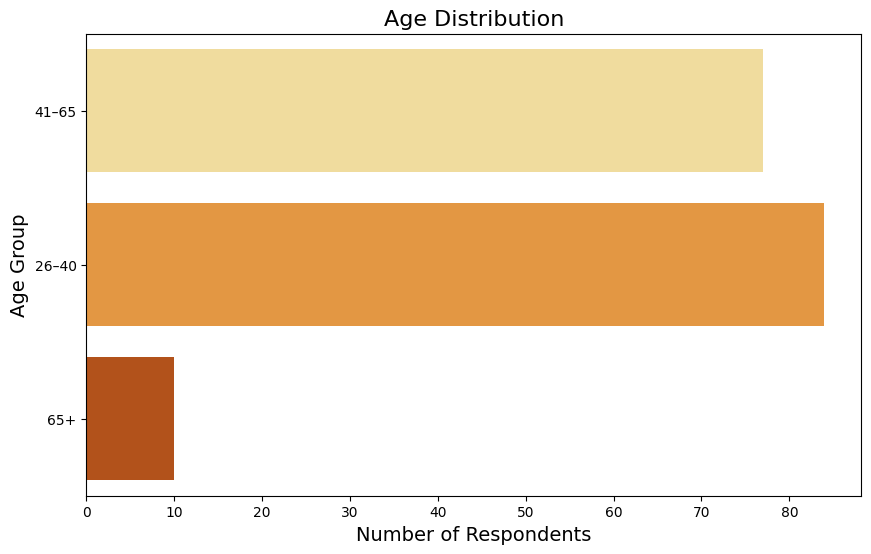

In [23]:
# Age Distribution (Horizontal Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(y='Age', data=df, palette='YlOrBr')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Number of Respondents', fontsize=14)
plt.ylabel('Age Group', fontsize=14)
plt.show()

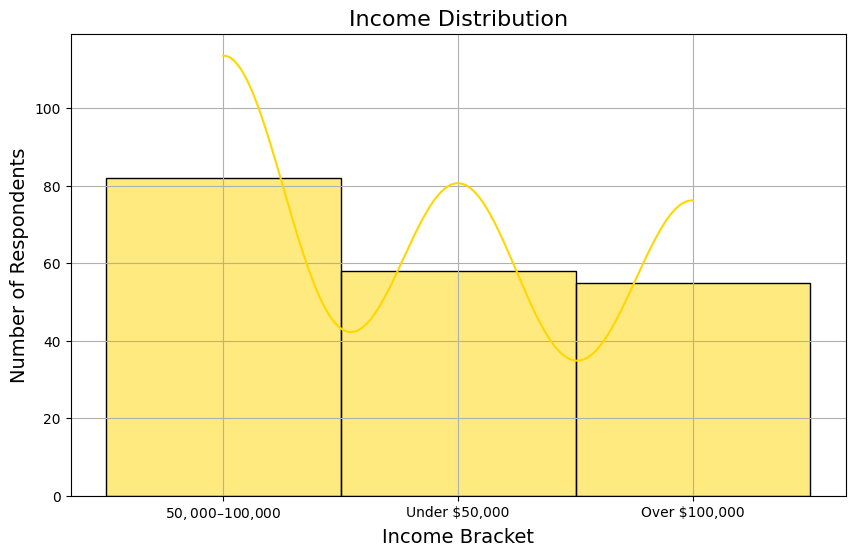

In [24]:
# Income Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=20, kde=True, color='gold', edgecolor='black')
plt.title('Income Distribution', fontsize=16)
plt.xlabel('Income Bracket', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.grid(True)
plt.show()

<ipython-input-25-fa9b49c8ae9d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Household_Type', data=df, palette='YlOrBr')


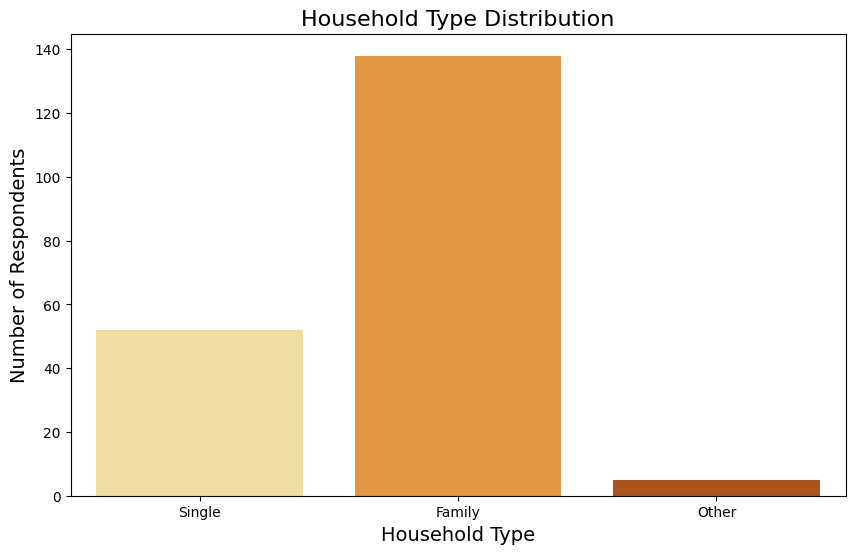

In [25]:
# Household Type Distribution (Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='Household_Type', data=df, palette='YlOrBr')
plt.title('Household Type Distribution', fontsize=16)
plt.xlabel('Household Type', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.show()

<ipython-input-26-1e5f3e5463a6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Profession', data=df, palette='YlOrBr')


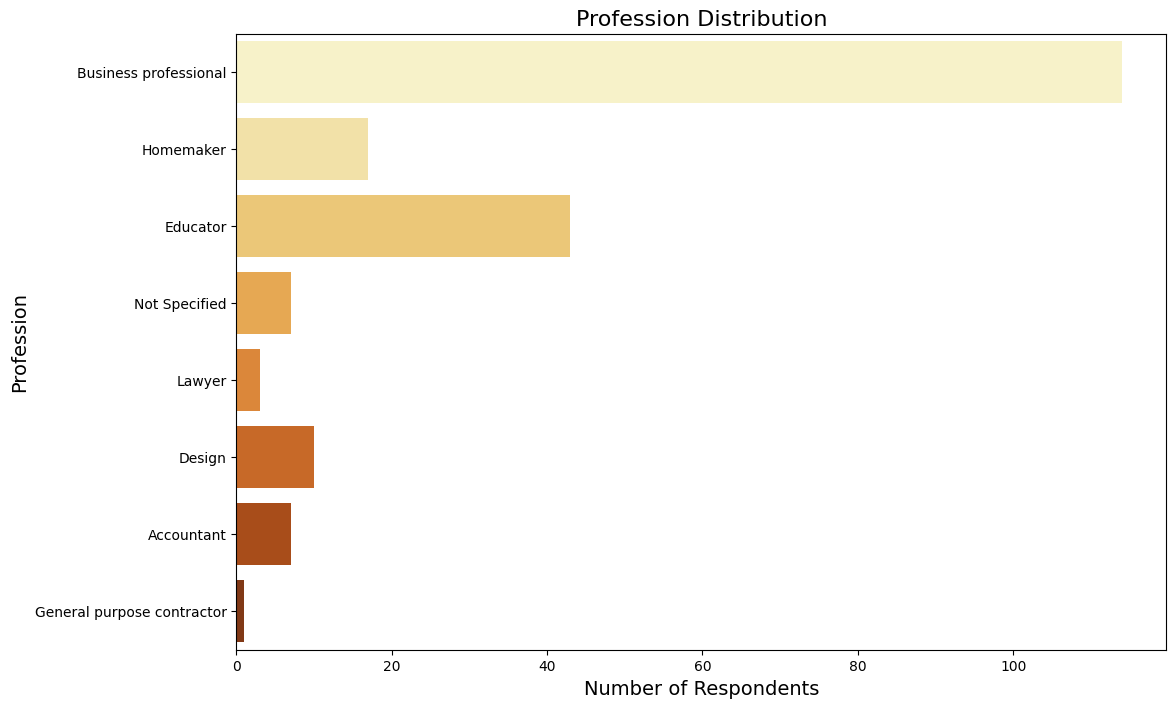

In [26]:
# Profession Distribution (Horizontal Bar Plot)
plt.figure(figsize=(12, 8))
sns.countplot(y='Profession', data=df, palette='YlOrBr')
plt.title('Profession Distribution', fontsize=16)
plt.xlabel('Number of Respondents', fontsize=14)
plt.ylabel('Profession', fontsize=14)
plt.show()

## Here are the visual summaries of the key demographic factors:


*   **Age Distribution**: Most respondents fall into the 26-40 and 41-65 age groups.
*   **Income Distribution**: The majority of respondents are in the $50,000- $100,000 and Over $100,000 income brackets.
*  **Gender Distribution**: There is a higher representation of females compared to males.
*   **Household Type Distribution**: Most respondents are part of a Family, followed by Single households.
*  **Profession Distribution**: The Business professional category is the most common, followed by Homemaker. There is also a significant number of Other professions specified.

# Segmentation Anlaysis

In [27]:
# Step 1: Encode Categorical Variables
# Convert categorical variables into numeric ones for clustering
le = LabelEncoder()
for col in ['Gender', 'Age', 'Income', 'Household_Type', 'Profession']:
    df[col] = le.fit_transform(df[col])


<ipython-input-27-79f3f4095be4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-27-79f3f4095be4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-27-79f3f4095be4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [28]:
# Step 2: Select Features for Clustering
# Use relevant columns that reflect both demographics and behavior
features = [
    'Gender', 'Age', 'Income', 'Household_Type', 'Profession',
    'Value_Importance', 'Health_Importance', 'Taste_Importance',
    'Staff_Importance', 'Ambiance_Importance', 'Consistency_Importance',
    'Community_Importance', 'Convenience_Rating', 'Menu_Variety_Rating',
    'Value_Rating', 'Health_Rating', 'Taste_Rating', 'Staff_Rating',
    'Ambiance_Rating', 'Consistency_Rating', 'Community_Rating'
]

X = df[features]

In [33]:
# Step 3: Standardize the Data
scaler = StandardScaler()
# Impute missing values before scaling
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Or another strategy like 'median'
X_imputed = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

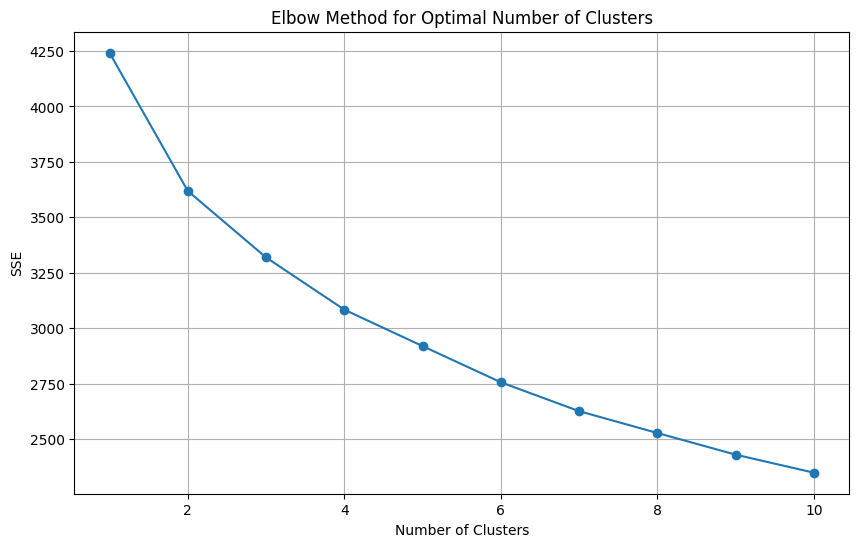

In [45]:
# Step 4: Determine the optimal number of clusters (if needed)
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [46]:
# Step 5: Assuming k=2 based on analysis
kmeans = KMeans(n_clusters=2, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

# Analyze the segments, focusing on numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
segment_analysis = df.groupby('Segment')[numeric_columns].mean()
print(segment_analysis)

              Age    Income    Gender  Household_Type  Profession  \
Segment                                                             
0        0.810811  0.932432  0.216216        0.675676    1.743243   
1        1.015625  0.960938  0.289062        0.625000    2.265625   

         Value_Importance  Health_Importance  Taste_Importance  \
Segment                                                          
0                1.689189           1.191781          1.094595   
1                2.956897           1.859649          1.982609   

         Staff_Importance  Ambiance_Importance  ...  Convenience_Rating  \
Segment                                         ...                       
0                1.148649             1.418919  ...            1.351351   
1                2.626087             2.745614  ...            1.577586   

         Menu_Variety_Rating  Value_Rating  Health_Rating  Taste_Rating  \
Segment                                                                   
0      

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-46-bae33a6d3b76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Segment'] = kmeans.fit_predict(X_scaled)


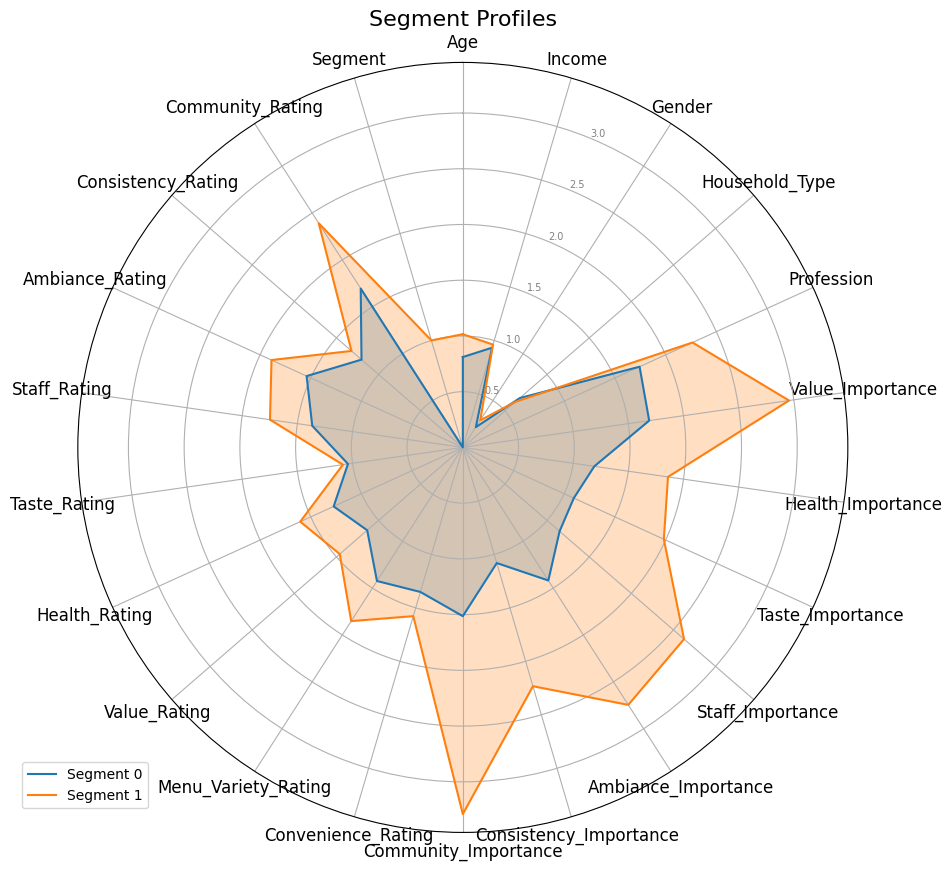

In [47]:
# Step 6: Plotting the Segment Profiles
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
categories = list(segment_analysis.columns)
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

for i in range(2):  # Adjust based on the number of clusters
    values = segment_analysis.iloc[i].tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Segment {i}')
    ax.fill(angles, values, alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories, fontsize=12)
plt.yticks(color="grey", size=7)
plt.title('Segment Profiles', fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


### **Segment 0: "Practical Families"**

-  This segment consists of younger adults, predominantly female, who are family-oriented and seek practical solutions when dining out. They balance their desire for value and taste with a more moderate concern for other factors like health, service, and ambiance.

### **Segment 1: "Quality Seekers"**

- This group, also predominantly female but slightly older, places a high emphasis on value, quality, and consistency. They are more selective and seek a well-rounded dining experience that includes great taste, health benefits, excellent service, and a strong connection to the community.



### **Expansion Recommendation**

### Location D:

- Population: 57,509 (largest)
- Median Age: 34.8
- Median Income: 75,000 USD
- Consumer Spend: $1,184 million (highest spend)
- Major Customer Profiles: Higher-income families and professionals (e.g., Brite Lites, Country Squires)
- **Analysis:** This location has the largest population, high income, and the highest consumer spending. The demographic profile aligns well with both "Practical Families" and "Quality Seekers," making it a very attractive option.
-**Recommendation:**
Location D is the best option for expansion. It offers the largest population, strong median income, and the highest consumer spend. The major customer profiles in this location suggest that it can attract both "Quality Seekers" and "Practical Families," making it the most promising location for growth and revenue generation.